# Build your Jupyter dashboard using Solara

Welcome to the first part of a series of tutorials that will show you how to create a dashboard in Jupyter and deploy it as a standalone web app. Importantly, there will be no need to rewrite your app in a different framework, no need to use a non-Python solution, and no need to use JavaScript or CSS.

Jupyter notebooks are an incredible tool for data analysis, since they enable blending code, visualization and narrative into a single document.
However, if the insights need to be presented to a non-technical audience, we usually do not want to show the code.

In this tutorial, we will create a simple dashboard using Solara's UI components. The final product will allow an end-user to filter,
visualize and explore a dataset on a map.

![image](https://dxhl76zpt6fap.cloudfront.net/public/docs/tutorial/jupyter-dashboard1.webp)

## Pre-requisits 

You need to install `pandas`, `matplotlib`, `folium` and `solara`. Assuming you are using pip, you can execute on your shell:

```
$ pip install pandas matplotlib folium solara
```


Or in your notebook
```
%pip install pandas matplotlib folium solara
```

## The start

We will use a subsample of the [San Fanfrisco crime dataset](https://www.kaggle.com/competitions/sf-crime/data) which contains information on types of crimes and where they were committed.

[Download the CSV file](https://raw.githubusercontent.com/widgetti/solara/master/solara/website/pages/docs/content/04-tutorial/SF_crime_sample.csv.gz) if you want to run this locally, or let the code below sort it out.

The first thing we do when we read in the data is to print it out, to see what the dataset contains.

In [1]:
import pandas as pd
from pathlib import Path
import solara

ROOT = Path(solara.__file__).parent / 'website' / 'pages' / 'docs' / 'content' / '04-tutorial'
path = ROOT / Path('SF_crime_sample.csv.gz')
url = "https://raw.githubusercontent.com/widgetti/solara/master/solara/website/pages/docs/content/04-tutorial/SF_crime_sample.csv"

if path.exists():
    df_crime = pd.read_csv(path)
else:
    df_crime = pd.read_csv(url)

df_crime


,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,50820,160525689,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Tuesday,06/28/2016 12:00:00 AM,21:25,TARAVAL,"ARREST, BOOKED",600 Block of LINCOLN WY,-122.464850,37.765888,"(37.7658875448653, -122.464850114297)",16052568905051
1,11981,160334220,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Friday,04/22/2016 12:00:00 AM,19:00,TARAVAL,NONE,SAN JOSE AV / LAKEVIEW AV,-122.450378,37.716169,"(37.7161694707734, -122.450378171697)",16033422006243
2,74626,160740053,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Monday,09/12/2016 12:00:00 AM,08:40,INGLESIDE,NONE,0 Block of PHELAN AV,-122.452290,37.725693,"(37.7256933575703, -122.452289660492)",16074005306303
3,60776,160619721,WARRANTS,WARRANT ARREST,Monday,08/01/2016 12:00:00 AM,16:12,PARK,"ARREST, BOOKED",1100 Block of SCOTT ST,-122.437099,37.780352,"(37.7803522156893, -122.43709942832)",16061972163010
4,34547,160345772,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,04/27/2016 12:00:00 AM,19:34,SOUTHERN,"ARREST, BOOKED",600 Block of BRANNAN ST,-122.399841,37.775633,"(37.7756327864282, -122.399841045579)",16034577262050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,137465,170013301,OTHER OFFENSES,HARASSING PHONE CALLS,Saturday,11/26/2016 12:00:00 AM,12:00,SOUTHERN,NONE,1100 Block of MISSION ST,-122.412834,37.777790,"(37.7777903094246, -122.412834332129)",17001330128135
9996,55811,160573939,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Thursday,07/07/2016 12:00:00 AM,19:00,BAYVIEW,NONE,100 Block of TEXAS ST,-122.395812,37.764531,"(37.7645312950153, -122.395812338479)",16057393971010
9997,120115,166110038,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Saturday,05/14/2016 12:00:00 AM,03:30,CENTRAL,NONE,BAY ST / VANNESS AV,-122.425111,37.804146,"(37.80414615262, -122.425110613231)",16611003806244
9998,5069,160093943,NON-CRIMINAL,AIDED CASE,Monday,02/01/2016 12:00:00 AM,15:23,TARAVAL,"ARREST, BOOKED",2600 Block of SAN JOSE AV,-122.450635,37.715772,"(37.7157715048394, -122.450634805259)",16009394351040


The data looks clean but since we will work with the `Category` and `PdDistrict` column data, lets convert those columns to title case.

In [2]:
df_crime['Category'] = df_crime['Category'].str.title()
df_crime['PdDistrict'] = df_crime['PdDistrict'].str.title()
df_crime


,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,50820,160525689,Burglary,"BURGLARY OF STORE, FORCIBLE ENTRY",Tuesday,06/28/2016 12:00:00 AM,21:25,Taraval,"ARREST, BOOKED",600 Block of LINCOLN WY,-122.464850,37.765888,"(37.7658875448653, -122.464850114297)",16052568905051
1,11981,160334220,Larceny/Theft,PETTY THEFT FROM LOCKED AUTO,Friday,04/22/2016 12:00:00 AM,19:00,Taraval,NONE,SAN JOSE AV / LAKEVIEW AV,-122.450378,37.716169,"(37.7161694707734, -122.450378171697)",16033422006243
2,74626,160740053,Larceny/Theft,PETTY THEFT FROM A BUILDING,Monday,09/12/2016 12:00:00 AM,08:40,Ingleside,NONE,0 Block of PHELAN AV,-122.452290,37.725693,"(37.7256933575703, -122.452289660492)",16074005306303
3,60776,160619721,Warrants,WARRANT ARREST,Monday,08/01/2016 12:00:00 AM,16:12,Park,"ARREST, BOOKED",1100 Block of SCOTT ST,-122.437099,37.780352,"(37.7803522156893, -122.43709942832)",16061972163010
4,34547,160345772,Warrants,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,04/27/2016 12:00:00 AM,19:34,Southern,"ARREST, BOOKED",600 Block of BRANNAN ST,-122.399841,37.775633,"(37.7756327864282, -122.399841045579)",16034577262050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,137465,170013301,Other Offenses,HARASSING PHONE CALLS,Saturday,11/26/2016 12:00:00 AM,12:00,Southern,NONE,1100 Block of MISSION ST,-122.412834,37.777790,"(37.7777903094246, -122.412834332129)",17001330128135
9996,55811,160573939,Other Offenses,LOST/STOLEN LICENSE PLATE,Thursday,07/07/2016 12:00:00 AM,19:00,Bayview,NONE,100 Block of TEXAS ST,-122.395812,37.764531,"(37.7645312950153, -122.395812338479)",16057393971010
9997,120115,166110038,Larceny/Theft,GRAND THEFT FROM LOCKED AUTO,Saturday,05/14/2016 12:00:00 AM,03:30,Central,NONE,BAY ST / VANNESS AV,-122.425111,37.804146,"(37.80414615262, -122.425110613231)",16611003806244
9998,5069,160093943,Non-Criminal,AIDED CASE,Monday,02/01/2016 12:00:00 AM,15:23,Taraval,"ARREST, BOOKED",2600 Block of SAN JOSE AV,-122.450635,37.715772,"(37.7157715048394, -122.450634805259)",16009394351040


Using proper software engineering practices, we write a function that filters a dataframe to contain only the rows that match our chosen districts and categories.

In [ ]:
def crime_filter(df, district_values, category_values):
    df_dist = df.loc[df['PdDistrict'].isin(district_values)]
    df_category = df_dist.loc[df_dist['Category'].isin(category_values)]
    return df_category


dff_crime = crime_filter(df_crime, ['Bayview', 'Northern'], ['Vandalism', 'Assault', 'Robbery'])


Now, with our filtered dataset, we create two barcharts. We use regular pandas and matplotlib, but seaborn or plotly would also have been appropriate choices.

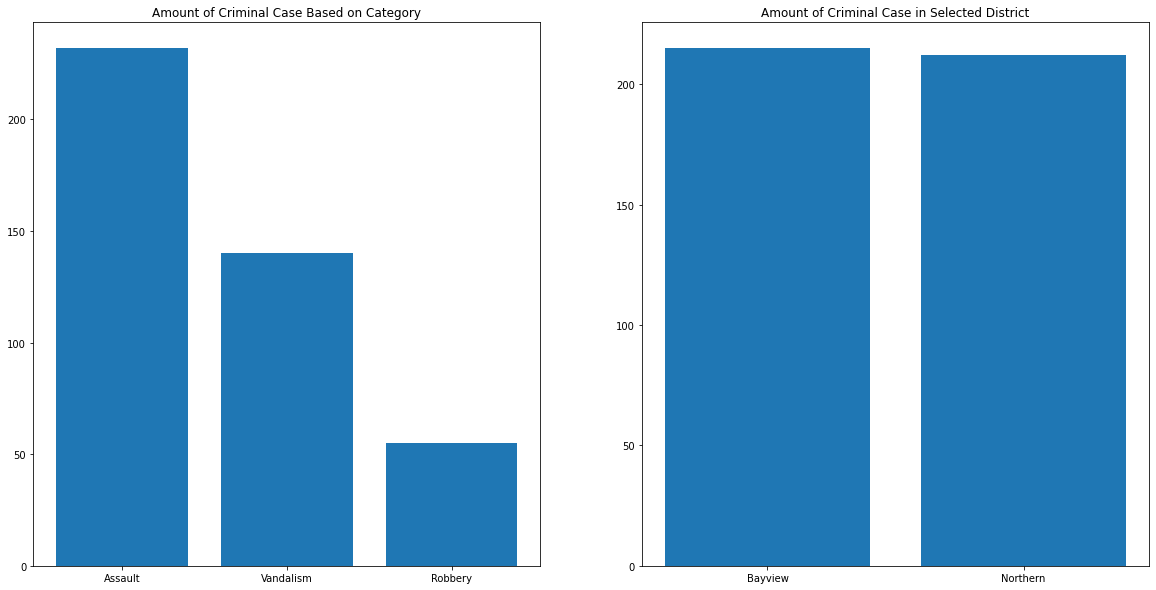

In [4]:
import matplotlib.pyplot as plt

def crime_charts(df):
    cat_unique = df['Category'].value_counts()
    cat_unique = cat_unique.reset_index()
    
    dist_unique = df['PdDistrict'].value_counts()
    dist_unique = dist_unique.reset_index()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

    ax1.bar(cat_unique['Category'], cat_unique['count'])
    ax1.set_title('Amount of Criminal Case Based on Category')
    ax2.bar(dist_unique['PdDistrict'], dist_unique['count'])
    ax2.set_title('Amount of Criminal Case in Selected District')

    display(fig)
    plt.close(fig)

crime_charts(dff_crime)


Since we do not need bi-directional communication (e.g. we do not need to receive events or data from our map), we use folium to display the locations of the committed crimes on a map. If we do need bi-directional communication, we can also decide to use [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/usage/index.html).

We cannot display all the data on the map without crashing your browser, so we limit to a maximum of a 50 points.

In [ ]:
import folium
import folium.plugins


def crime_map(df):
    latitude = 37.77
    longitude = -122.42
    
    sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

    incidents = folium.plugins.MarkerCluster().add_to(sanfran_map)

    # loop through the dataframe and add each data point to the mark cluster
    for lat, lng, label, in zip(df.Y, df.X, df.Category):
        folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        ).add_to(incidents)
    
    # show map
    display(sanfran_map)
crime_map(dff_crime.iloc[0:50, :])


## Making our first reactive visualization

The above code works nicely, but if we want to explore different types of crimes, we need to manually modify and run all cells that determine out output. Would it not be much better to have a UI with controls that determine the filtering, and a view that displays the filtered data interactively?

Lets start by importing the solara package, and create three reactive variables.

In [ ]:
import solara
districts = solara.reactive(['Bayview', 'Northern'],)
categories = solara.reactive(['Vandalism', 'Assault', 'Robbery'])
limit = solara.reactive(100)


 A reactive variable is a container around a value (like a int, string or list) that allows the UI to automatically listen to changes. Any change to `your_reactive_variable.value` will be picked up by solara component that use them, so that they can automatically redraw or update itself.

 We now create our first component (`View`) which filters the data (based on the reactive variables), and shows the map and the charts. Solara supports the `display` mechanism of Jupyter, so we can simply use our previously defined functions.

In [ ]:
@solara.component
def View():
    dff = crime_filter(df_crime, districts.value, categories.value)
    row_count = len(dff)
    if row_count > limit.value:
        solara.Warning(f"Only showing the first {limit.value} of {row_count:,} crimes on map")
    crime_map(dff.iloc[:limit.value])
    if row_count > 0:
        crime_charts(dff)
    else:
        solara.Warning("You filtered out all the data, no charts shown")
View()


Note that some of the code (like the warning and the charts) are conditional. Solara will automatically find out what to add, remove or update without you having to do this manually. Solara is declarative (similar to ReactJS), but also reactive. If we change the reactive variables, Solara sees that changes and notifies the component instances that use its value. After executing the next lines of code, our `View` will automatically update.

In [ ]:
limit.value = 70
districts.value = ['Soutern', 'Northern']


We can now explore out data much faster, since we don't need to re-run the cells that depended on it. 

## Adding controls

We created a mini app in our notebook that is declerative *and* reactive, but we still need to manually modify the values by executing a code cell, while we promised a UI to control it. Luckily, all Solara input components supports reactive variables. This means that controlling a reactive variable using a UI element is often a one-liner.

In [ ]:
solara.SelectMultiple('District', all_values=[str(k) for k in df_crime['PdDistrict'].unique().tolist()], values=districts)


Whow, that was simple! We can now easily change the filter and see the results update. Lets do this for all our reactive variables, and put them into a single component.

In [ ]:
@solara.component
def Controls():
    solara.SelectMultiple('District', all_values=[str(k) for k in df_crime['PdDistrict'].unique().tolist()], values=districts)
    solara.SelectMultiple('Category', all_values=[str(k) for k in df_crime['Category'].unique().tolist()], values=categories)
    solara.Text("Maximum number of rows to show on map")
    solara.SliderInt('', value=limit, min=1, max=1000)
Controls()


Note that the reactive variables are bi-directional, meaning that if you change it in the UI elements, it gets reflected on the Python code!

In [ ]:
# Note that we can read AND write reactive variables
categories.value = [*categories.value, 'Warrants']


## The final dashboard

We now have two parts of our UI in separate cells. This can be an amazing experience when developing in a notebook, as it flows naturally in the data exploration process while writing your notebook.

However, your end user will probably want something more coherent. The components we created are perfectly re-usable, so we put them together in a single UI.

In [ ]:
@solara.component
def Page():
    with solara.Sidebar():
        Controls()
    View()
Page()


## Conclusions

Using Solara, you created an interactive dashboard within a Jupyter notebook. Your Solara components are declarative, and when using reactive variables also reactive. Whether you change a reactive variables via code or the UI elements, your visualizations and map update automatically.

Your dashboard prototype now runs in your Jupyter notebook environment, but we still have a few steps to we want to take. In our next tutorial, we will focus on deploying our notebook, without making any code changes. In our third tutorial we will expand our dashboard with a few more components and focus on creating a more advanced layout.



